# Linear Regression


Use Case: Salary Prediction


Problem Statement:


Build a model to predict salary based on the number years of experience.


Data:
Use the Salary_Data dataset and analyse the relationship between YearsExperience and Salary variables using a linear regression.


# Import Libraries

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
# read data
d1=pd.read_csv('Salary_Data.csv')


In [3]:
d1

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
# first five rows
d1.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
# descriptive statistics
d1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
#  concise summary of a DataFrame
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [7]:
# shape of the data
print(d1.shape)

(30, 2)


In [8]:
# pairwise correlation between columns
d1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


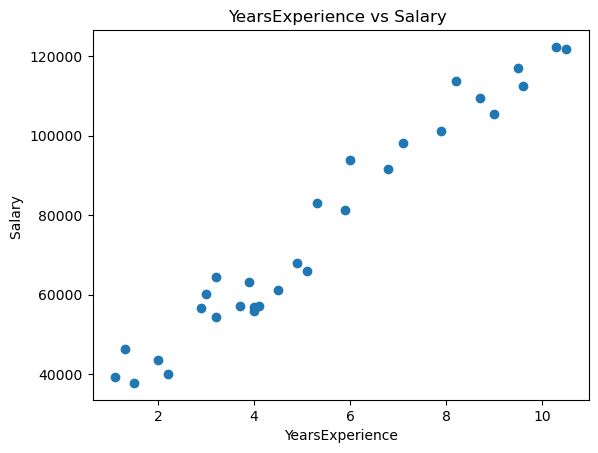

In [9]:
# visualizes the relationship between YearsExperience and Salary using a scatter plot
x=d1['YearsExperience']
y=d1['Salary']
#x=d1.iloc[:,0]
#y=d1.iloc[:,1]
plt.plot(x,y,'o')
plt.title('YearsExperience vs Salary ')
plt.xlabel("YearsExperience")
plt.ylabel('Salary ')
plt.show()

In [10]:
# create a scatter plot with a regression line
#sns.regplot(x=x,y=y,ci=None) # sns.regplot(x=x,y=y) has shaded area


# Splitting Data into Training and Testing Dataset

In [10]:
# defining dependent and independent variable 
x=d1.iloc[:,:1].values
y=d1.iloc[:,1].values

In [11]:
print(x) 

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [12]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [13]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
print("x_train")
print(x_train)
print("x_test")
print(x_test)

x_train
[[ 9.5]
 [ 2. ]
 [ 8.7]
 [ 7.9]
 [ 8.2]
 [ 2.2]
 [ 1.5]
 [ 9. ]
 [ 3. ]
 [ 5.9]
 [ 4.1]
 [ 3.2]
 [ 9.6]
 [ 1.3]
 [ 5.1]
 [ 1.1]
 [ 4.9]
 [10.5]
 [10.3]
 [ 3.7]
 [ 3.2]
 [ 4. ]
 [ 4. ]
 [ 2.9]]
x_test
[[5.3]
 [7.1]
 [3.9]
 [6. ]
 [4.5]
 [6.8]]


In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


In [16]:
print("Y:",y)
print("y_train:",y_train)
print("y_test",y_test)

Y: [ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]
y_train: [116969  43525 109431 101302 113812  39891  37731 105582  60150  81363
  57081  54445 112635  46205  66029  39343  67938 121872 122391  57189
  64445  56957  55794  56642]
y_test [83088 98273 63218 93940 61111 91738]


# Creating Linear Regression Model [y=aX+b]
Where X=Predictor/Independant variable, 

Y=Response/Dependant Variable, 

a= Coefficient and b=Intercept


In this example, X is YearsExperience and Y is Salary

In [17]:
from sklearn.linear_model import LinearRegression # sklearn - scikit learn -> importimg the linear regression class
regressor=LinearRegression() # initialise the object class
regressor.fit(x_train,y_train) # Training the algorithm, values of m and c
# model learns from the pattern in the training data -> finds the optimal values for m and c


LinearRegression()

# Interpreting Model Coefficients

In [18]:
print(regressor.intercept_) # intercept (c) of the regression line/ y-axis the constant term

25609.897998354834


In [19]:
print(regressor.coef_) # coefficient (m) of the regression line/ slope

[9332.94473799]


Y=mx+c
Salary=9332.94473799(YearsExperience)+25609.89799835482

In [20]:
# we are making prediction on new data
regressor.predict([[11]])

array([128272.29011627])

In [26]:
# test the model on the testing data
ypred = regressor.predict(x_test)

In [27]:
ypred

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

In [28]:
# y = mx + c
9332.94473799*11+25609.89799835482

128272.29011624481

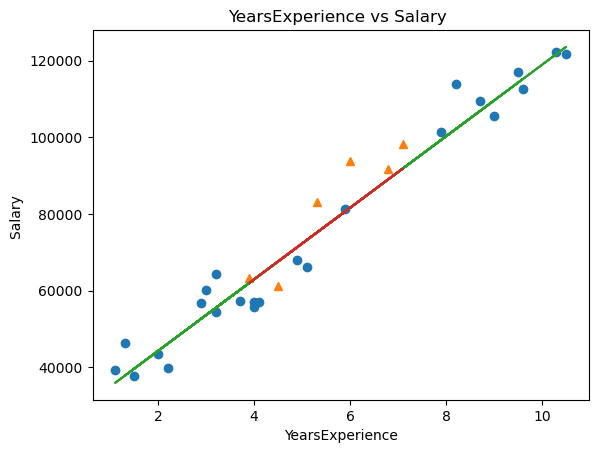

In [29]:
# visualize the regression line
plt.plot(x_train,y_train,'o')
plt.plot(x_test, y_test, '^')
plt.plot(x_train,regressor.predict(x_train))
plt.plot(x_test,ypred)
plt.title('YearsExperience vs Salary ')
plt.xlabel("YearsExperience")
plt.ylabel('Salary ')
plt.show()